In [1]:
from numpy import *
from plot_service import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
train_file = 'datasets/redshifts.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Data loaded!')

Data loaded!


In [4]:
plot_simple_table(X_train.T[:, :30])

| 20.8201 | 18.5113 | 17.2795 | 16.7894 | 16.4611 | 0.181395  | 0.0123181  | 0.00690208 | 0.00650488 | 0.0170449  |
| 19.1041 | 17.3282 | 16.304  | 15.8546 | 15.5137 | 0.0542467 | 0.00679417 | 0.00442695 | 0.00423764 | 0.00878743 |
| 20.6168 | 18.5021 | 17.3794 | 16.9137 | 16.5403 | 0.147581  | 0.0111245  | 0.00677101 | 0.00662477 | 0.0145896  |
| 22.0622 | 20.1525 | 18.4359 | 17.706  | 17.2676 | 0.56777   | 0.051707   | 0.0177945  | 0.0141868  | 0.0334817  |
| 20.2099 | 18.3034 | 17.2462 | 16.819  | 16.4606 | 0.0796464 | 0.00858408 | 0.00567301 | 0.00556344 | 0.0111667  |
| 20.7708 | 18.6046 | 17.3616 | 16.9112 | 16.5767 | 0.126928  | 0.0101941  | 0.00598473 | 0.00575985 | 0.0128102  |
| 22.5801 | 20.5084 | 18.6342 | 17.8495 | 17.4039 | 1.10245   | 0.0779481  | 0.0216593  | 0.0163227  | 0.0391475  |
| 18.8676 | 17.5225 | 17.0249 | 16.7668 | 16.6301 | 0.0523219 | 0.00970681 | 0.00734196 | 0.00740002 | 0.0195377  |
| 19.3541 | 17.5048 | 16.5986 | 16.1868 | 15.886  | 0.0433344 | 0.005688

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
score = model.score(X_val, y_val)

pred = preds.reshape(len(preds))
real = y_test

In [15]:
plot_table(real, pred)

|     Real |    Predict |
|----------+------------|
| 0.202258 |  0.119627  |
| 0.384286 |  0.306828  |
| 0.033815 | -0.0377653 |
| 0.635514 |  0.578367  |
| 0.082844 |  0.0987735 |
| 0.077451 |  0.176291  |
| 0.173062 |  0.173082  |
| 0.140931 |  0.162985  |
| 0.042802 |  0.0285974 |
| 0.080199 |  0.08156   |
| 0.159216 |  0.123365  |
| 0.275251 |  0.274626  |
| 0.137887 |  0.152509  |
| 0.242895 |  0.170698  |
| 0.085739 |  0.128795  |
| 0.167368 |  0.197318  |
| 0.049474 |  0.0422757 |
| 0.389837 |  0.321603  |
| 0.175565 |  0.162074  |
| 0.12229  |  0.104301  |
| 0.18369  |  0.162481  |
| 0.066047 |  0.0813705 |
| 0.101232 |  0.119663  |
| 0.188021 |  0.190451  |
| 0.25487  |  0.403958  |
| 0.088456 |  0.107822  |
| 0.135544 |  0.137747  |
| 0.333799 |  0.314794  |
| 0.257815 |  0.263703  |
| 0.066265 |  0.111366  |
| 0.085536 |  0.134076  |
| 0.380118 |  0.347927  |
| 0.14705  |  0.110941  |
| 0.503077 |  0.463926  |
| 0.071456 |  0.130123  |
| 0.001909 | -0.0891922 |
| 0.146141 |

In [16]:
plot_table_cf('Coeficientes', model.coef_)

|   Coeficientes |
|----------------|
|    -0.00793112 |
|     0.116495   |
|     0.0587918  |
|    -0.0862891  |
|    -0.0448342  |
|     0.0289412  |
|    -0.0620169  |
|     1.41337    |
|     0.0540749  |
|    -0.00486902 |


In [11]:
print("Score: ", score)
print("Mean squared error: %.2f" % mean_squared_error(real, pred))
print('Variance score: %.2f' % r2_score(real, pred))

Score:  0.758926580169
Mean squared error: 0.00
Variance score: 0.82


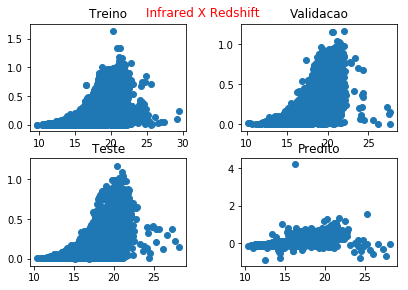

In [12]:
 plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

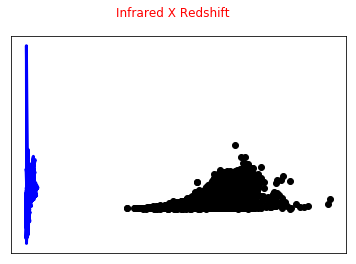

In [13]:
plot_scatter_lr(X_train, y_train, real, pred, show_only=True)

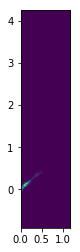

In [14]:
plot_hm(real, pred, show_only=True)